## Image Visualization  of Bird and Plane  images.
## Image segmentation 

In [1]:
# importing packages
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from numpy import asarray
from sklearn import metrics
from sklearn import mixture
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_sample_image
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler, normalize 
#%matplotlib inline

In [2]:
# load the image
image_bird = Image.open('42049_colorBird.jpg')
image_plane = Image.open('3096_colorPlane.jpg')

In [3]:
# preparing data
pixels_bird = asarray(image_bird)
pixels_plane = asarray(image_plane)

In [4]:
# converting to 5D vector of image of bird

pix= pixels_bird.astype('float32')
n_rows = len(pixels_bird)
n_cols = len(pixels_bird[0])
B = []
for i in range(n_rows):#n_rows
    for j in range(n_cols):#n_cols
        #print (j,i)
        temp = [i,j]
        #temp = []
        temp.append(pix[i][j][0])
        temp.append(pix[i][j][1])
        temp.append(pix[i][j][2])
        
        B.append(temp)
B= np.asmatrix(B)
df= pd.DataFrame(B)
df.columns = ['x', 'y','r','g','b']
df_b = df
print (df_b)

# converting to 5D vector of image of plane

pix= pixels_plane.astype('float32')
n_rows = len(pixels_plane)
n_cols = len(pixels_plane[0])
B = []
for i in range(n_rows):#n_rows
    for j in range(n_cols):#n_cols
        #print (j,i)
        temp = [i,j]
        #temp = []
        temp.append(pix[i][j][0])
        temp.append(pix[i][j][1])
        temp.append(pix[i][j][2])
        
        B.append(temp)
B= np.asmatrix(B)
df= pd.DataFrame(B)
df.columns = ['x', 'y','r','g','b']
df_p = df
print (df_p)


            x      y     r      g      b
0         0.0    0.0  59.0   87.0  111.0
1         0.0    1.0  60.0   88.0  112.0
2         0.0    2.0  61.0   89.0  113.0
3         0.0    3.0  63.0   91.0  115.0
4         0.0    4.0  65.0   93.0  117.0
...       ...    ...   ...    ...    ...
154396  320.0  476.0  44.0   54.0   55.0
154397  320.0  477.0  45.0   50.0   54.0
154398  320.0  478.0  27.0   27.0   35.0
154399  320.0  479.0  29.0   27.0   38.0
154400  320.0  480.0  88.0  102.0  128.0

[154401 rows x 5 columns]
            x      y      r      g      b
0         0.0    0.0  138.0  138.0  148.0
1         0.0    1.0  138.0  138.0  148.0
2         0.0    2.0  138.0  138.0  148.0
3         0.0    3.0  137.0  137.0  147.0
4         0.0    4.0  137.0  137.0  147.0
...       ...    ...    ...    ...    ...
154396  320.0  476.0   85.0   98.0  115.0
154397  320.0  477.0   86.0   99.0  116.0
154398  320.0  478.0   84.0   97.0  114.0
154399  320.0  479.0   80.0   93.0  110.0
154400  320.0  480.

In [5]:
#Normalising with min max values
#bird
scaler = MinMaxScaler(feature_range=[0, 1])
b_rescaled = scaler.fit_transform(df_b)
b_rescaled.shape
#plane
scaler = MinMaxScaler(feature_range=[0, 1])
p_rescaled = scaler.fit_transform(df_p)
p_rescaled.shape

(154401, 5)

In [6]:
#normalised 5 d vector
print(b_rescaled,p_rescaled)

[[0.         0.         0.24180328 0.3452381  0.44578313]
 [0.         0.00208333 0.24590164 0.34920635 0.4497992 ]
 [0.         0.00416667 0.25       0.3531746  0.45381526]
 ...
 [1.         0.99583333 0.11065574 0.10714286 0.14056225]
 [1.         0.99791667 0.11885246 0.10714286 0.15261044]
 [1.         1.         0.36065574 0.4047619  0.51405622]] [[0.         0.         0.75       0.75409836 0.82681564]
 [0.         0.00208333 0.75       0.75409836 0.82681564]
 [0.         0.00416667 0.75       0.75409836 0.82681564]
 ...
 [1.         0.99583333 0.45652174 0.53005464 0.63687151]
 [1.         0.99791667 0.43478261 0.50819672 0.61452514]
 [1.         1.         0.29347826 0.34972678 0.41340782]]


In [7]:
# scree plot preparation
pca = decomposition.PCA(n_components = 5)
#bird
pc_b = pca.fit_transform(b_rescaled)
v_b = pca.explained_variance_ratio_
#plane
pc_p = pca.fit_transform(p_rescaled)
v_p = pca.explained_variance_ratio_
print(pc_b)

[[ 0.51121382  0.71110777  0.1341381  -0.15284955 -0.02739554]
 [ 0.50415007  0.70966325  0.13343836 -0.1522062  -0.02775029]
 [ 0.49708631  0.70821873  0.13273862 -0.15156285 -0.02810504]
 ...
 [ 0.87734358 -0.69784927  0.31912243 -0.08003086 -0.02776826]
 [ 0.86594612 -0.69925758  0.31698724 -0.08136724 -0.03662575]
 [ 0.36678466 -0.7026299   0.15538982 -0.12161496 -0.06466463]]


In [8]:
# scree plot preparation
pc_df_b = pd.DataFrame(data = pc_b , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pc_df_p = pd.DataFrame(data = pc_p , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pc_df_b.head()
print (pca.explained_variance_)

[1.01513903e-01 8.37252612e-02 4.51903087e-02 1.27507260e-03
 4.43843613e-05]


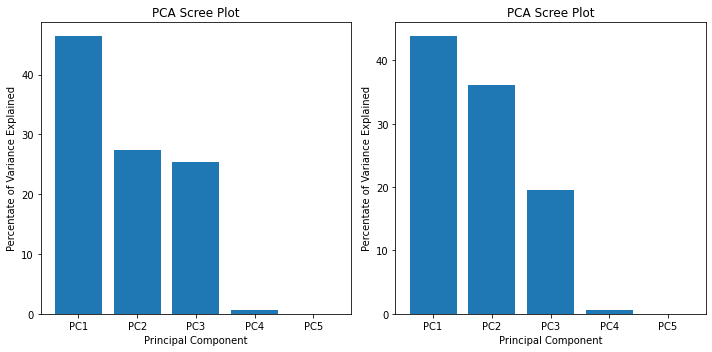

In [9]:
# scree plot
fig = plt.figure(1,figsize=(10,5))
plt.subplot(1, 2, 1)
percent_variance = np.round(v_b* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')


plt.subplot(1, 2, 2)
percent_variance = np.round(v_p* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns )
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.tight_layout()
plt.show()

## Most of the data is explained by first three components. So we will use first 3 components for PCA, we take D=3.

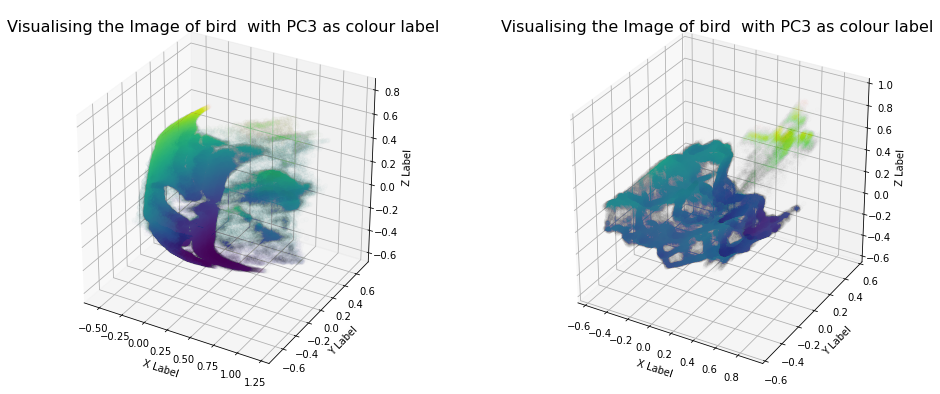

In [10]:
# PCA-based representations of the feature vectors in 3 dimensional subspace.

fig = plt.figure(1,figsize=(20, 11))

#plt.subplot(231)
x1 = pc_b[:, 0]
y1 = pc_b[:, 1]*-1
z1 = pc_b[:, 2]
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(x1, y1, z1,c=z1, alpha = .006)
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.set_title('Visualising the Image of bird  with PC3 as colour label', fontsize=16)
x1 = pc_p[:, 0]
y1 = pc_p[:, 1]*-1
z1 = pc_p[:, 2]

ax = fig.add_subplot(232, projection='3d')
ax.scatter(x1, y1, z1,c=z1, alpha = .004)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Visualising the Image of bird  with PC3 as colour label', fontsize=16)
plt.tight_layout()
plt.show()


In [95]:
#tsne with perplexity 5,30,50
tsne = TSNE(n_components=2,perplexity=5,random_state = 0)
tsne_b_5 = tsne.fit_transform(b_rescaled)
tsne_p_5 = tsne.fit_transform(p_rescaled)
tsne = TSNE(n_components=2,perplexity=30,random_state = 0)
tsne_b_30 = tsne.fit_transform(b_rescaled)
tsne_p_30 = tsne.fit_transform(p_rescaled)
tsne = TSNE(n_components=2,perplexity=50,random_state = 0)
tsne_b_50 = tsne.fit_transform(b_rescaled)
tsne_p_50 = tsne.fit_transform(p_rescaled)


In [11]:
tsne = TSNE(n_components=2,perplexity=30,random_state = 0)
tsne_b_30 = tsne.fit_transform(b_rescaled)
tsne_p_30 = tsne.fit_transform(p_rescaled)


In [12]:
# preparation for PCA and tsne plots
# bird
df_b['tsne1'] = tsne_b_30[:,0]
df_b['tsne2'] = tsne_b_30[:,1]
df_b['pca1'] = pc_b[:,0]
df_b['pca2'] = pc_b[:,1]*-1
df_b['pca3'] = pc_b[:,2]
# plane
df_p['tsne1'] = tsne_p_30[:,0]
df_p['tsne2'] = tsne_p_30[:,1]
df_p['pca1'] = pc_p[:,0]
df_p['pca2'] = pc_p[:,1]*-1
df_p['pca3'] = pc_p[:,2]



Text(0.5, 1.0, 'TSNE plot with perplexity = 30(plane)')

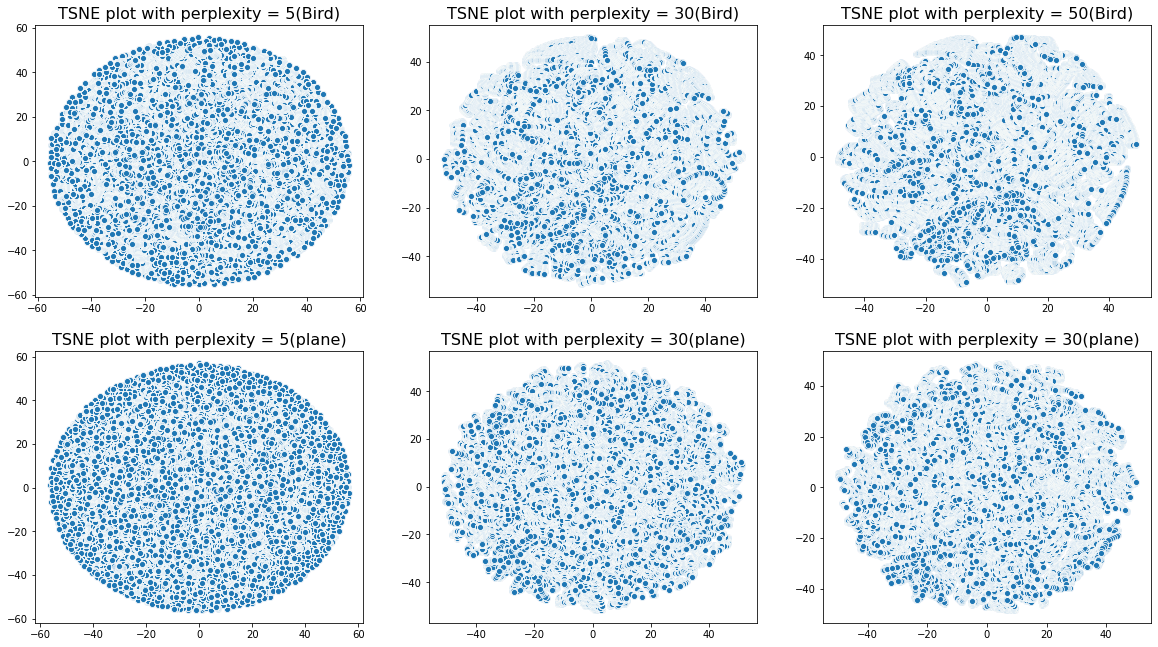

In [106]:
# tsne plot for bird and plane for perplexity 5,30,50
plt.figure(1,figsize=(20, 11))
plt.subplot(231)
ax = sns.scatterplot(x=tsne_b_5[:, 0], y=tsne_b_5[:, 1])
ax.set_title('TSNE plot with perplexity = 5(Bird)',fontsize = 16)

plt.subplot(232)
ax = sns.scatterplot(x=tsne_b_30[:, 0], y=tsne_b_30[:, 1])
ax.set_title('TSNE plot with perplexity = 30(Bird)',fontsize = 16)

plt.subplot(233)
ax = sns.scatterplot(x=tsne_b_50[:, 0], y=tsne_b_50[:, 1])
ax.set_title('TSNE plot with perplexity = 50(Bird)',fontsize = 16)

plt.subplot(234)
ax = sns.scatterplot(x=tsne_p_5[:, 0], y=tsne_p_5[:, 1])
ax.set_title('TSNE plot with perplexity = 5(plane)',fontsize = 16)

plt.subplot(235)
ax = sns.scatterplot(x=tsne_p_30[:, 0], y=tsne_p_30[:, 1])
ax.set_title('TSNE plot with perplexity = 30(plane)',fontsize = 16)


plt.subplot(236)
ax = sns.scatterplot(x=tsne_p_50[:, 0], y=tsne_p_50[:, 1])
ax.set_title('TSNE plot with perplexity = 30(plane)',fontsize = 16)

## We see from above that best clusters are formed when perplexity is 50. When the perplexity is 5 too many clusters are formed and this not be quite useful. 

## Implementing K-means clustering ,returning to pca and tsne

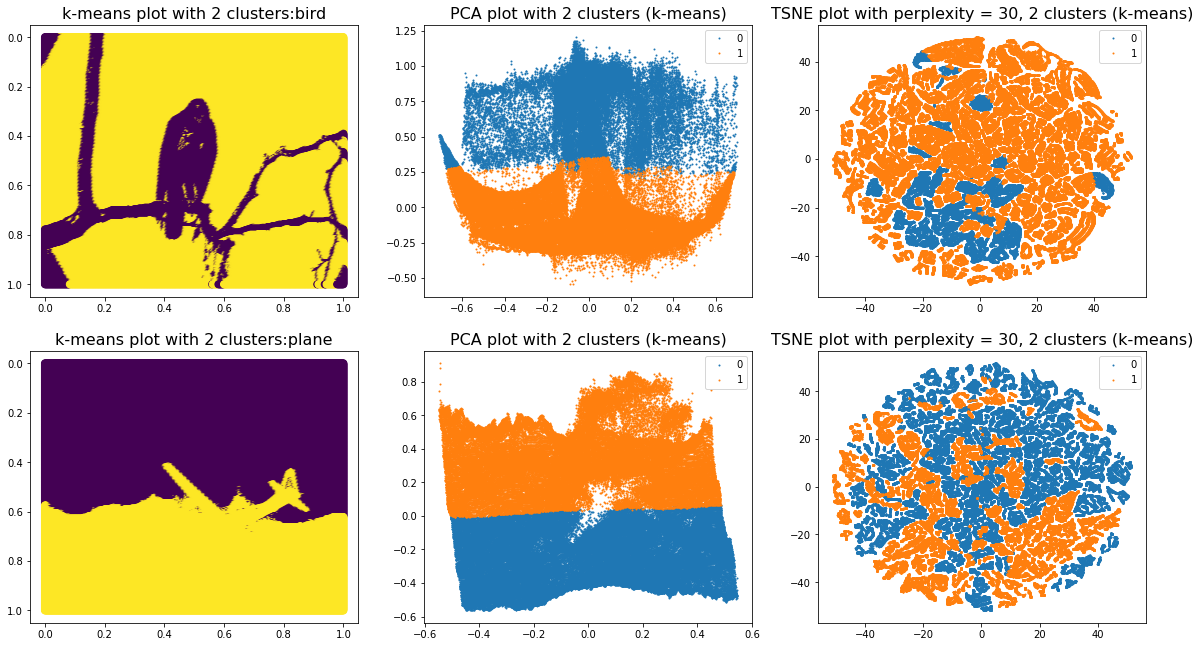

In [158]:
# implementing kmeans with 2 clusters
fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
labels_b_2 = KMeans(2, random_state=0).fit_predict(b_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=labels_b_2,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 2 clusters:bird',fontsize = 16 )

# bird pca
df_b['k-means2'] = labels_b_2
groups = df_b.groupby('k-means2')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 2 clusters (k-means)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 2 clusters (k-means)',fontsize = 16)



#plane
plt.subplot(234)
labels_p_2 = KMeans(2, random_state=0).fit_predict(p_rescaled)
plt.scatter(p_rescaled[:, 1], p_rescaled[:, 0], c=labels_p_2,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 2 clusters:plane',fontsize = 16 )

# plane pca

df_p['k-means2'] = labels_p_2
groups = df_p.groupby('k-means2')
ax = plt.subplot(235)
for name, group in groups:#
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 2 clusters (k-means)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 2 clusters (k-means)',fontsize = 16)

plt.show()



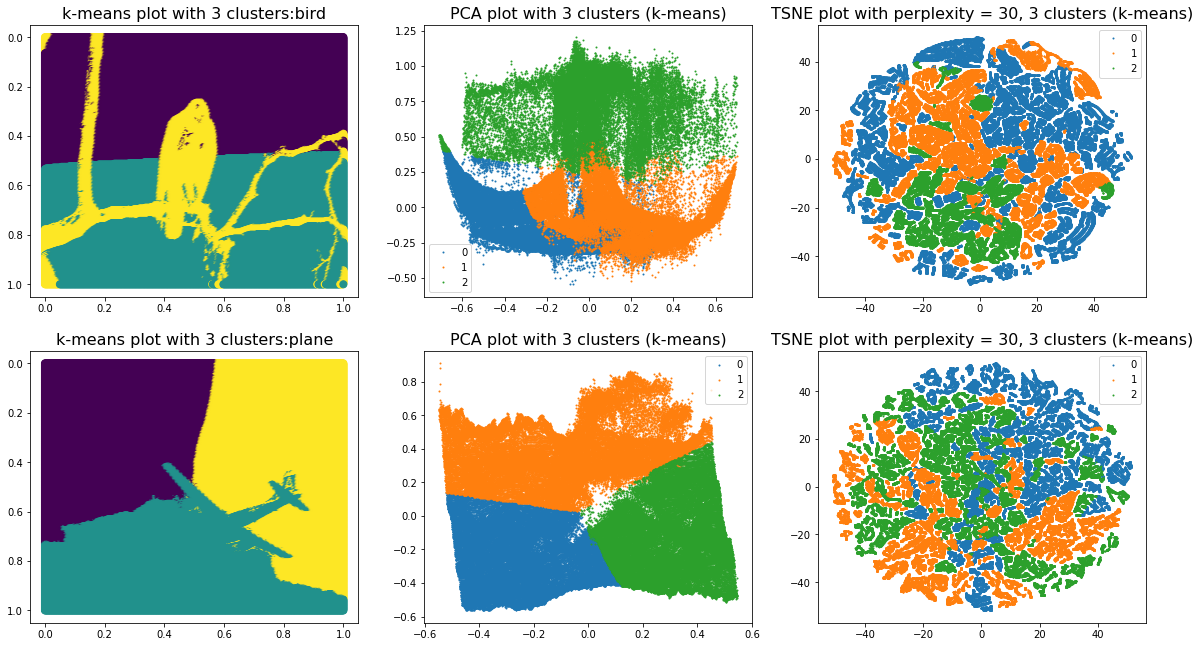

In [164]:
# implementing kmeans with 3 clusters
fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
labels_b_3 = KMeans(3, random_state=0).fit_predict(b_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=labels_b_3,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 3 clusters:bird',fontsize = 16 )

# bird pca
df_b['k-means3'] = labels_b_3
groups = df_b.groupby('k-means3')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 3 clusters (k-means)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 3 clusters (k-means)',fontsize = 16)



#plane
plt.subplot(234)
labels_p_3 = KMeans(3, random_state=0).fit_predict(p_rescaled)
plt.scatter(p_rescaled[:, 1], p_rescaled[:, 0], c=labels_p_3,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 3 clusters:plane',fontsize = 16 )

# plane pca

df_p['k-means3'] = labels_p_3
groups = df_p.groupby('k-means3')
ax = plt.subplot(235)
for name, group in groups:#
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 3 clusters (k-means)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 3 clusters (k-means)',fontsize = 16)

plt.show()



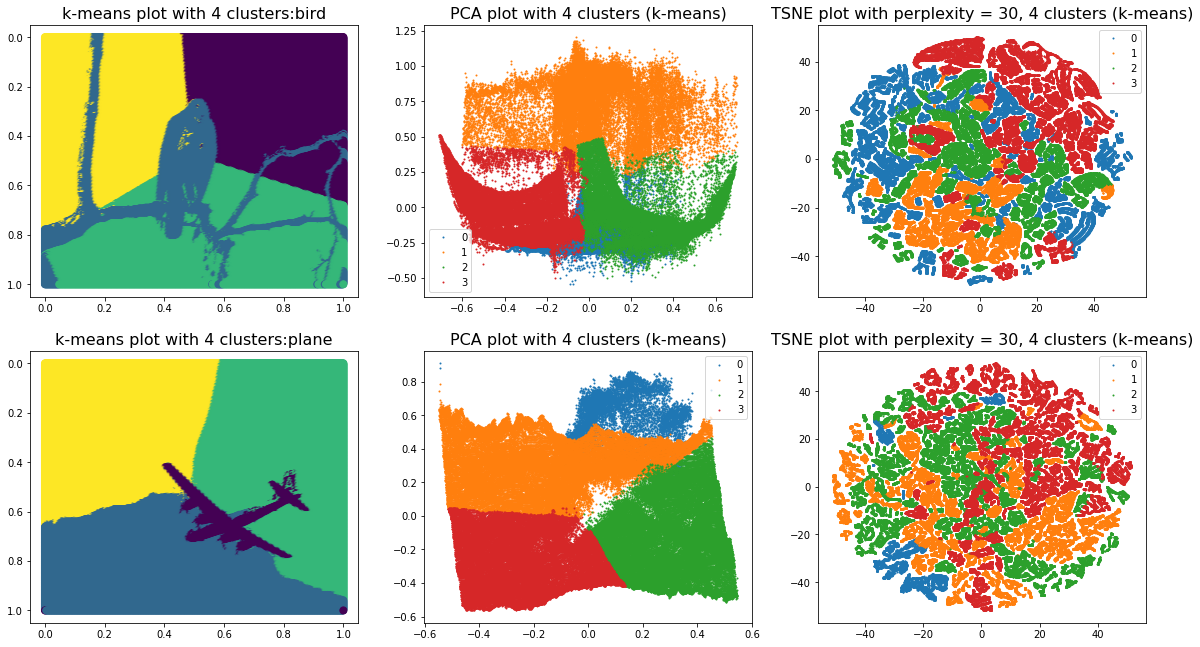

In [163]:
# implementing kmeans with 4 clusters
fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
labels_b_4 = KMeans(4, random_state=0).fit_predict(b_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=labels_b_4,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 4 clusters:bird',fontsize = 16 )

# bird pca
df_b['k-means4'] = labels_b_4
groups = df_b.groupby('k-means4')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 4 clusters (k-means)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 4 clusters (k-means)',fontsize = 16)



#plane
plt.subplot(234)
labels_p_4 = KMeans(4, random_state=0).fit_predict(p_rescaled)
plt.scatter(p_rescaled[:, 1], p_rescaled[:, 0], c=labels_p_4,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 4 clusters:plane',fontsize = 16 )

# plane pca

df_p['k-means4'] = labels_p_4
groups = df_p.groupby('k-means4')
ax = plt.subplot(235)
for name, group in groups:#
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 4 clusters (k-means)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 4 clusters (k-means)',fontsize = 16)

plt.show()



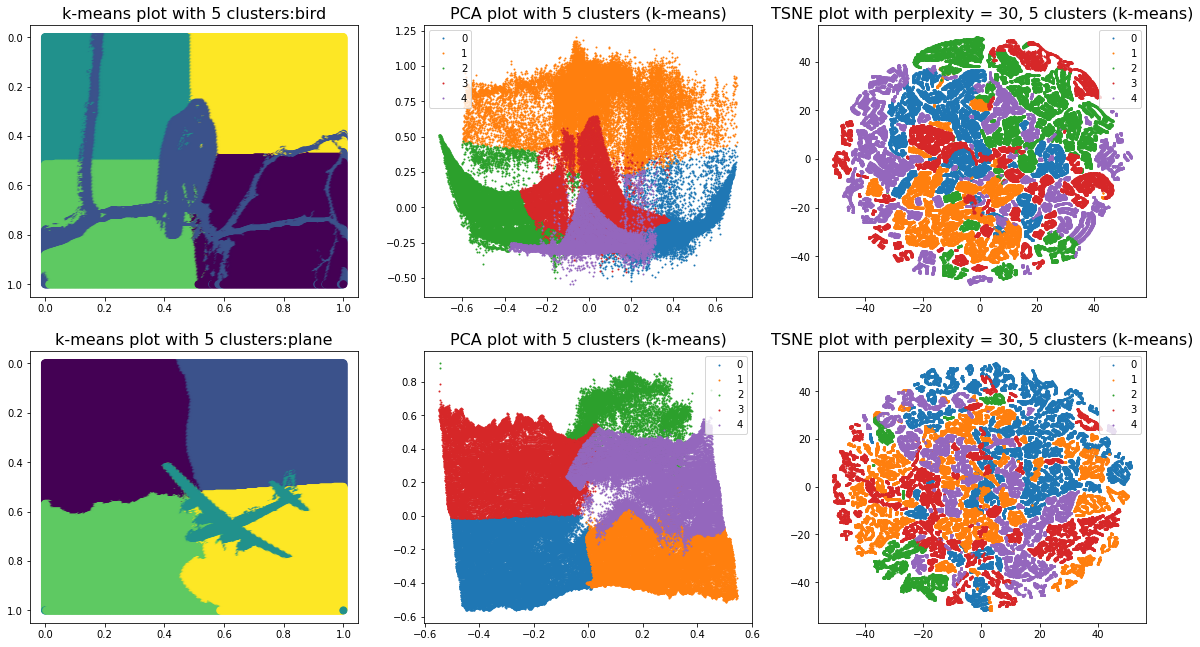

In [162]:
# implementing kmeans with 5 clusters
fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
labels_b_5 = KMeans(5, random_state=0).fit_predict(b_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=labels_b_5,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 5 clusters:bird',fontsize = 16 )

# bird pca
df_b['k-means5'] = labels_b_5
groups = df_b.groupby('k-means5')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 5 clusters (k-means)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 5 clusters (k-means)',fontsize = 16)



#plane
plt.subplot(234)
labels_p_5 = KMeans(5, random_state=0).fit_predict(p_rescaled)
plt.scatter(p_rescaled[:, 1], p_rescaled[:, 0], c=labels_p_5,s=50);
plt.gca().invert_yaxis()
plt.title('k-means plot with 5 clusters:plane',fontsize = 16 )

# plane pca

df_p['k-means5'] = labels_p_5
groups = df_p.groupby('k-means5')
ax = plt.subplot(235)
for name, group in groups:#
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('PCA plot with 5 clusters (k-means)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 5 clusters (k-means)',fontsize = 16)

plt.show()



In [168]:
# Silhouette score  bird
print("Silhouette score for 2 clusters:bird")
print(metrics.silhouette_score(b_rescaled, labels_b_2, metric = 'euclidean'))
print("Silhouette score for 3 clusters:bird")
print(metrics.silhouette_score(b_rescaled, labels_b_3, metric = 'euclidean'))
print("Silhouette score for 4 clusters:bird")
print(metrics.silhouette_score(b_rescaled, labels_b_4, metric = 'euclidean'))
print("Silhouette score for 5 clusters:bird")
print(metrics.silhouette_score(b_rescaled, labels_b_5, metric = 'euclidean'))


Silhouette score for 2 clusters:bird
0.46487877326795524
Silhouette score for 3 clusters:bird
0.36848016625344465
Silhouette score for 4 clusters:bird
0.3917421309997915
Silhouette score for 5 clusters:bird
0.4051623464507353


## From Silhoutte score we see that for bird 2 clusters are best as its score is the highest for k-means.

In [169]:
# calculating the CH value  bird
print("CH value for 2 clusters:bird")
print(metrics.calinski_harabasz_score(b_rescaled, labels_b_2))
print("CH value for 3 clusters:bird")
print(metrics.calinski_harabasz_score(b_rescaled, labels_b_3))
print("CH value for 4 clusters:bird")
print(metrics.calinski_harabasz_score(b_rescaled, labels_b_4))
print("CH value for 5 clusters:bird")
print(metrics.calinski_harabasz_score(b_rescaled, labels_b_5))

CH value for 2 clusters:bird
101966.14053570671
CH value for 3 clusters:bird
107334.39760391261
CH value for 4 clusters:bird
120416.25559077201
CH value for 5 clusters:bird
128907.2182859341


In [170]:
# Silhouette score  plane
print("Silhouette score for 2 clusters:plane")
print(metrics.silhouette_score(p_rescaled, labels_p_2, metric = 'euclidean'))
print("Silhouette score for 3 clusters:plane")
print(metrics.silhouette_score(p_rescaled, labels_p_3, metric = 'euclidean'))
print("Silhouette score for 4 clusters:plane")
print(metrics.silhouette_score(p_rescaled, labels_p_4, metric = 'euclidean'))
print("Silhouette score for 5 clusters:plane")
print(metrics.silhouette_score(p_rescaled, labels_p_5, metric = 'euclidean'))

Silhouette score for 2 clusters:plane
0.33950440320423747
Silhouette score for 3 clusters:plane
0.34546193533910197
Silhouette score for 4 clusters:plane
0.3889683272013425
Silhouette score for 5 clusters:plane
0.4108815193288031


## From Silhoutte score we see that for plane 5 clusters are best as its score is the highest for k-means.

In [171]:
# calculating the CH value  plane
print("CH value for 2 clusters:plane")
print(metrics.calinski_harabasz_score(p_rescaled, labels_p_2))
print("CH value for 3 clusters:plane")
print(metrics.calinski_harabasz_score(p_rescaled, labels_p_3))
print("CH value for 4 clusters:plane")
print(metrics.calinski_harabasz_score(p_rescaled, labels_p_4))
print("CH value for 5 clusters:plane")
print(metrics.calinski_harabasz_score(p_rescaled, labels_p_5))

CH value for 2 clusters:plane
77052.0849034117
CH value for 3 clusters:plane
85239.95949191184
CH value for 4 clusters:plane
102537.45806248748
CH value for 5 clusters:plane
129831.92933135088


## GMM implementation

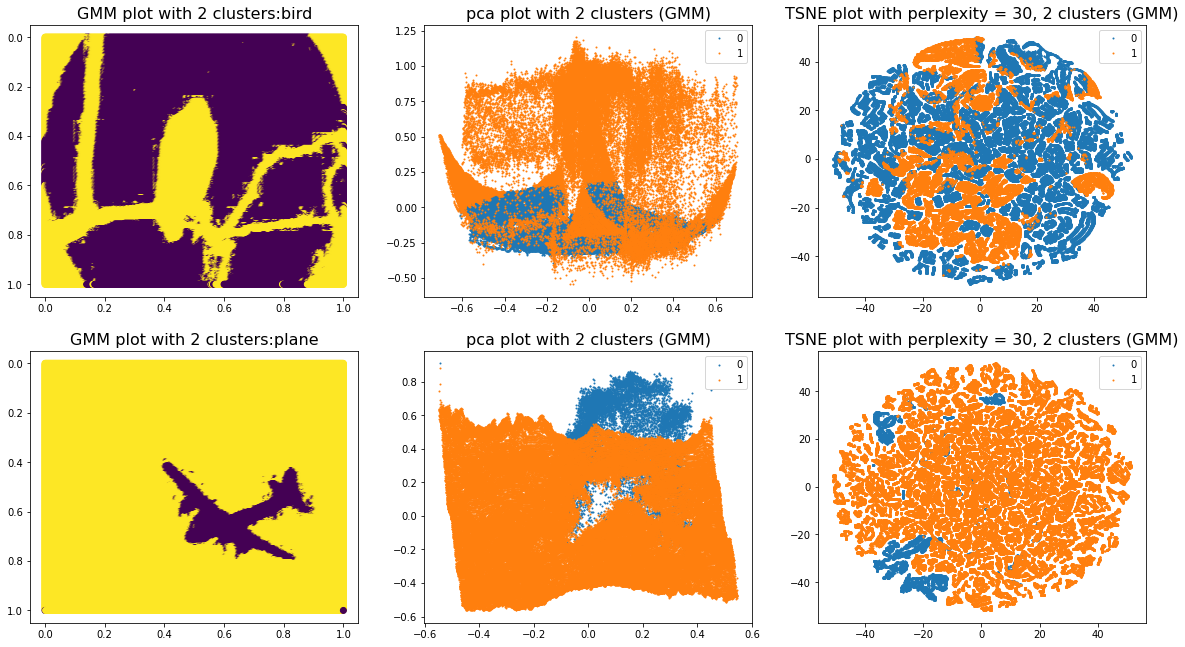

In [13]:
# implementing GMM with 2 clusters



fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
gmm = GaussianMixture(n_components=2).fit(b_rescaled)
gmm_b_2 = gmm.predict(b_rescaled)

plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_b_2);
plt.gca().invert_yaxis()
plt.title('GMM plot with 2 clusters:bird',fontsize = 16 )

# bird pca

df_b['gmm-2'] = gmm_b_2
groups = df_b.groupby('gmm-2')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 2 clusters (GMM)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 2 clusters (GMM)',fontsize = 16)



#plane
plt.subplot(234)
gmm = GaussianMixture(n_components=2).fit(p_rescaled)
gmm_p_2 = gmm.predict(p_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_p_2);
plt.gca().invert_yaxis()
plt.title('GMM plot with 2 clusters:plane',fontsize = 16 )

# plane pca

df_p['gmm-2'] = gmm_p_2
groups = df_p.groupby('gmm-2')
ax = plt.subplot(235)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 2 clusters (GMM)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 2 clusters (GMM)',fontsize = 16)

plt.show()


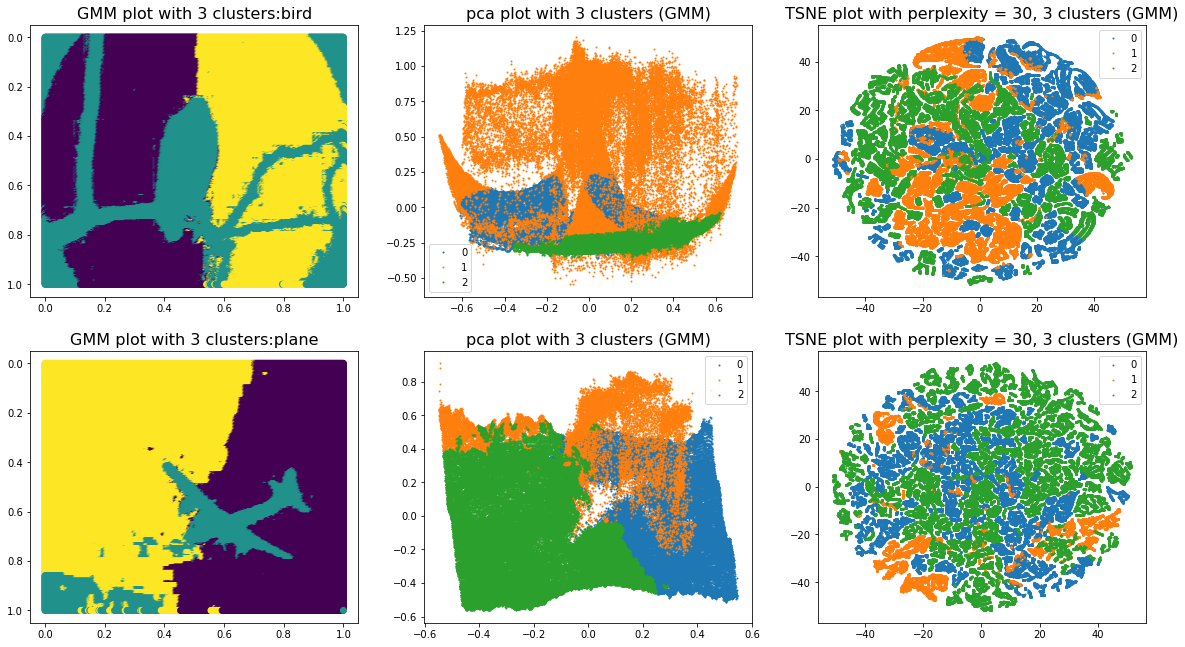

In [14]:
# implementing GMM with 3 clusters

fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
gmm = GaussianMixture(n_components=3).fit(b_rescaled)
gmm_b_3 = gmm.predict(b_rescaled)

plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_b_3);
plt.gca().invert_yaxis()
plt.title('GMM plot with 3 clusters:bird',fontsize = 16 )

# bird pca

df_b['gmm-3'] = gmm_b_3
groups = df_b.groupby('gmm-3')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 3 clusters (GMM)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 3 clusters (GMM)',fontsize = 16)



#plane
plt.subplot(234)
gmm = GaussianMixture(n_components=3).fit(p_rescaled)
gmm_p_3 = gmm.predict(p_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_p_3);
plt.gca().invert_yaxis()
plt.title('GMM plot with 3 clusters:plane',fontsize = 16 )

# plane pca

df_p['gmm-3'] = gmm_p_3
groups = df_p.groupby('gmm-3')
ax = plt.subplot(235)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 3 clusters (GMM)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 3 clusters (GMM)',fontsize = 16)

plt.show()


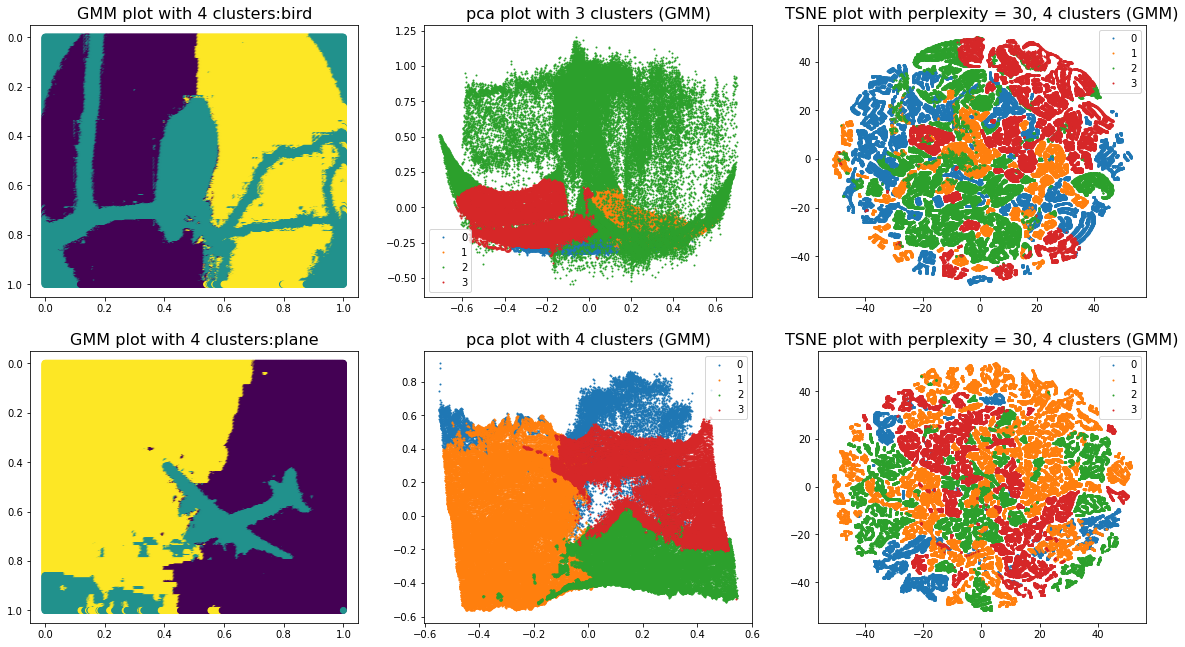

In [15]:
# implementing GMM with 4 clusters

fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
gmm = GaussianMixture(n_components=4).fit(b_rescaled)
gmm_b_4 = gmm.predict(b_rescaled)

plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_b_3);
plt.gca().invert_yaxis()
plt.title('GMM plot with 4 clusters:bird',fontsize = 16 )

# bird pca

df_b['gmm-4'] = gmm_b_4
groups = df_b.groupby('gmm-4')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 3 clusters (GMM)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 4 clusters (GMM)',fontsize = 16)



#plane
plt.subplot(234)
gmm = GaussianMixture(n_components=4).fit(p_rescaled)
gmm_p_4 = gmm.predict(p_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_p_3);
plt.gca().invert_yaxis()
plt.title('GMM plot with 4 clusters:plane',fontsize = 16 )

# plane pca

df_p['gmm-4'] = gmm_p_4
groups = df_p.groupby('gmm-4')
ax = plt.subplot(235)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 4 clusters (GMM)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 4 clusters (GMM)',fontsize = 16)

plt.show()


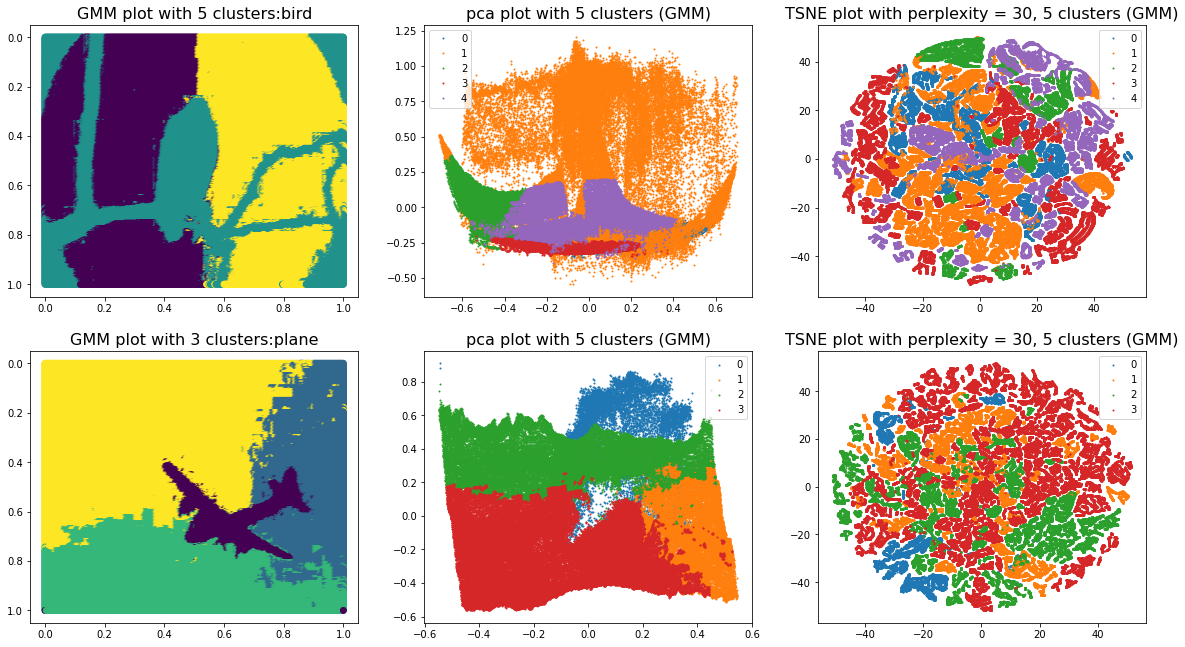

In [16]:
# implementing GMM with 5 clusters

fig = plt.figure(1,figsize=(20, 11))
plt.subplot(231)
#bird
gmm = GaussianMixture(n_components=5).fit(b_rescaled)
gmm_b_5 = gmm.predict(b_rescaled)

plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_b_3);
plt.gca().invert_yaxis()
plt.title('GMM plot with 5 clusters:bird',fontsize = 16 )

# bird pca

df_b['gmm-5'] = gmm_b_5
groups = df_b.groupby('gmm-5')
ax = plt.subplot(232)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 5 clusters (GMM)',fontsize = 16)
#plt.gca().invert_yaxis()

# bird tsne
ax = plt.subplot(233)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 5 clusters (GMM)',fontsize = 16)



#plane
plt.subplot(234)
gmm = GaussianMixture(n_components=4).fit(p_rescaled)
gmm_p_5 = gmm.predict(p_rescaled)
plt.scatter(b_rescaled[:, 1], b_rescaled[:, 0], c=gmm_p_5);
plt.gca().invert_yaxis()
plt.title('GMM plot with 3 clusters:plane',fontsize = 16 )

# plane pca

df_p['gmm-5'] = gmm_p_5
groups = df_p.groupby('gmm-5')
ax = plt.subplot(235)
for name, group in groups:
    ax.plot(group.pca2, group.pca1, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('pca plot with 5 clusters (GMM)',fontsize = 16)
#plt.gca().invert_xaxis()

# plane tsne
ax = plt.subplot(236)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE plot with perplexity = 30, 5 clusters (GMM)',fontsize = 16)

plt.show()


In [17]:
# Silhouette score by euclidean distance for 5 clusters


# Silhouette score  bird GMM
print("Silhouette score for 2 clusters,GMM:bird : ",metrics.silhouette_score(b_rescaled, gmm_b_2, metric = 'euclidean'))
print("Silhouette score for 3 clusters,GMM:bird : ",metrics.silhouette_score(b_rescaled, gmm_b_3, metric = 'euclidean'))
print("Silhouette score for 4 clusters,GMM:bird : ",metrics.silhouette_score(b_rescaled, gmm_b_4, metric = 'euclidean'))
print("Silhouette score for 5 clusters,GMM:bird : ",metrics.silhouette_score(b_rescaled, gmm_b_5, metric = 'euclidean'))

# Silhouette score  plane GMM
print("Silhouette score for 2 clusters,GMM:plane : ",metrics.silhouette_score(p_rescaled, gmm_p_2, metric = 'euclidean'))
print("Silhouette score for 3 clusters,GMM:plane : ",metrics.silhouette_score(p_rescaled, gmm_p_3, metric = 'euclidean'))
print("Silhouette score for 4 clusters,GMM:plane : ",metrics.silhouette_score(p_rescaled, gmm_p_4, metric = 'euclidean'))
print("Silhouette score for 5 clusters,GMM:plane : ",metrics.silhouette_score(p_rescaled, gmm_p_5, metric = 'euclidean'))




Silhouette score for 2 clusters,GMM:bird :  0.3232065407620278
Silhouette score for 3 clusters,GMM:bird :  0.2698336044120131
Silhouette score for 4 clusters,GMM:bird :  0.27266775725567616
Silhouette score for 5 clusters,GMM:bird :  0.2430135207994165
Silhouette score for 2 clusters,GMM:plane :  0.3765162233103242
Silhouette score for 3 clusters,GMM:plane :  0.3058029211424239
Silhouette score for 4 clusters,GMM:plane :  0.31851194791796344
Silhouette score for 5 clusters,GMM:plane :  0.3119476786250112


## Implementing Hierarchical clustering

In [11]:
# taking random smples as the size is too big
df_b_s = df_b.sample(frac =0.1,random_state =1)
df_p_s = df_p.sample(frac =0.1,random_state =1)

In [13]:
#Normalising with min max values
scaler = MinMaxScaler(feature_range=[0, 1])
df_b_s_rescaled = scaler.fit_transform(df_b_s)
df_p_s_rescaled = scaler.fit_transform(df_p_s)

In [14]:
# Implementing PCA
# bird
pca1 = sklearnPCA(n_components=3).fit_transform(df_b_s)
df_b_s['pca1'] = pca1[:,0]
df_b_s['pca2'] = pca1[:,1]*-1
df_b_s['pca3'] = pca1[:,2]

# plane
pca1 = sklearnPCA(n_components=3).fit_transform(df_p_s)
df_p_s['pca1'] = pca1[:,0]
df_p_s['pca2'] = pca1[:,1]*-1
df_p_s['pca3'] = pca1[:,2]

In [15]:
# Implementing tsne

tsne = TSNE(n_components=2,perplexity=30,random_state = 0)
tsne_b_s_30 = tsne.fit_transform(df_b_s_rescaled)
tsne_p_s_30 = tsne.fit_transform(df_p_s_rescaled)

In [40]:
# bird
df_b_s['tsne1'] = tsne_b_s_30[:,0]
df_b_s['tsne2'] = tsne_b_s_30[:,1]

# plane
df_p_s['tsne1'] = tsne_p_s_30[:,0]
df_p_s['tsne2'] = tsne_p_s_30[:,1]

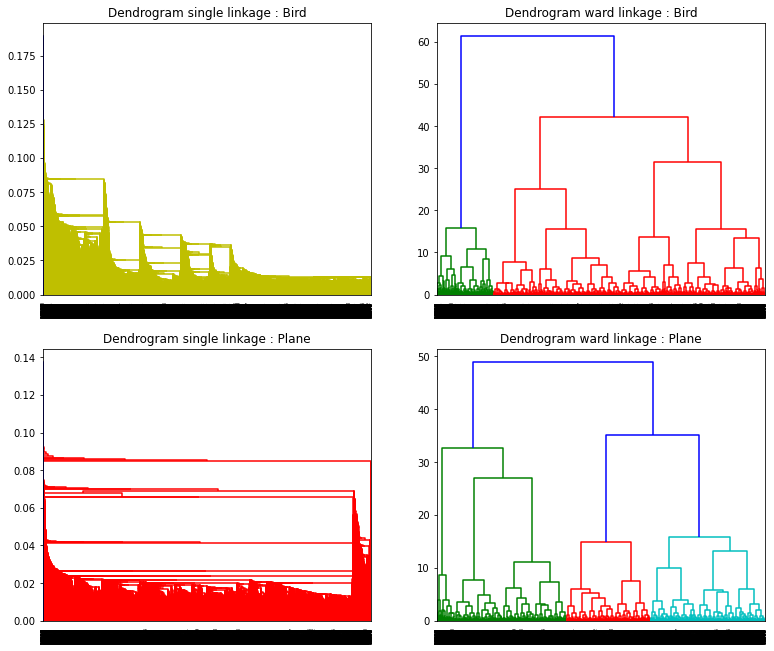

In [17]:
## plotting the Dendrogram with method = 'single' and 'ward'
fig = plt.figure(1,figsize=(20, 11))
# bird 
plt.subplot(231)
plt.title('Dendrogram single linkage : Bird') 
Dendrogram_b_single = shc.dendrogram((shc.linkage(df_b_s_rescaled, method ='single')))
plt.subplot(232)
plt.title('Dendrogram ward linkage : Bird') 
Dendrogram_b_ward = shc.dendrogram((shc.linkage(df_b_s_rescaled, method ='ward')))

# plane
plt.subplot(234)
plt.title('Dendrogram single linkage : Plane') 
Dendrogram_p_single = shc.dendrogram((shc.linkage(df_p_s_rescaled, method ='single')))
plt.subplot(235)
plt.title('Dendrogram ward linkage : Plane') 
Dendrogram_p_ward = shc.dendrogram((shc.linkage(df_p_s_rescaled, method ='ward')))

## We see that clustering is not proper when single linkage is used. So we have tried with ward linkage, and this shows proper clustering.

Text(0.5, 1.0, 'TSNE(perp=30) 2 clusters,ward linkage:Plane')

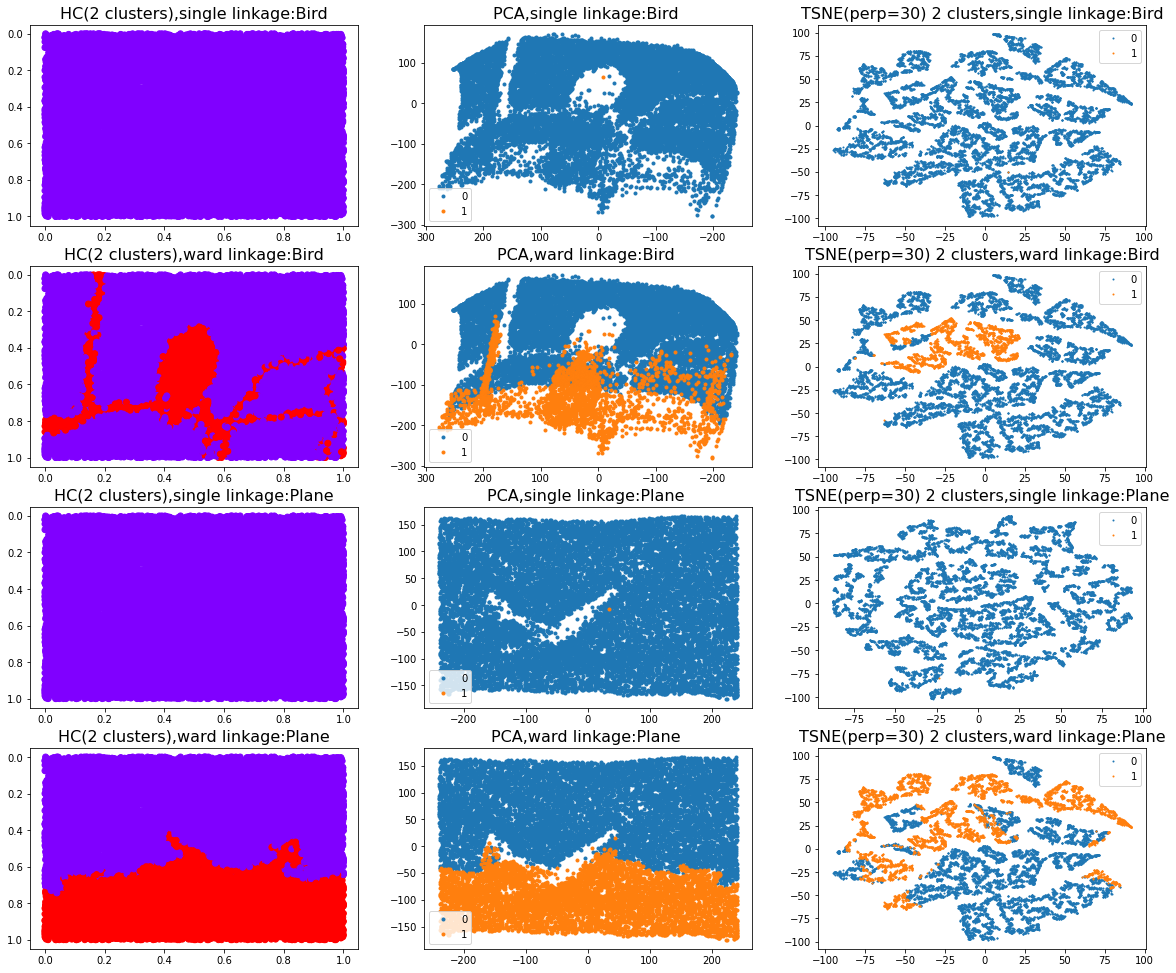

In [43]:
# implementing hierarchical clustering with 2 clusters 
fig = plt.figure(1,figsize=(20, 17))
# bird 
plt.subplot(431)
ac2_b_s = AgglomerativeClustering(n_clusters = 2, linkage = "single") 
hc_2_b_s = ac2_b_s.fit_predict(df_b_s_rescaled)
df_b_s['hc_2_b_s'] = hc_2_b_s  
#plt.figure(figsize =(6, 6)) 
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_2_b_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(2 clusters),single linkage:Bird',fontsize = 16)

# pca single linkage bird
groups = df_b_s.groupby('hc_2_b_s')
ax = plt.subplot(432)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
plt.gca().invert_xaxis()
ax.set_title('PCA,single linkage:Bird ',fontsize = 16)
# tsne single linkage bird
groups = df_b_s.groupby('hc_2_b_s')
ax = plt.subplot(433)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 2 clusters,single linkage:Bird',fontsize = 16)


# ward linkage bird
ax = plt.subplot(434)
ac2_b_w = AgglomerativeClustering(n_clusters = 2, linkage = "ward") 
hc_2_b_w = ac2_b_w.fit_predict(df_b_s_rescaled)
df_b_s['hc_2_b_w'] = hc_2_b_w  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_2_b_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(2 clusters),ward linkage:Bird',fontsize = 16)
# PCA ward bird
groups = df_b_s.groupby('hc_2_b_w')
ax = plt.subplot(435)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Bird ',fontsize = 16)
plt.gca().invert_xaxis()
# tsne ward linkage bird
groups = df_b_s.groupby('hc_2_b_w')
ax = plt.subplot(436)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 2 clusters,ward linkage:Bird',fontsize = 16)



# plane
plt.subplot(437)
ac2_p_s = AgglomerativeClustering(n_clusters = 2, linkage = "single") 
hc_2_p_s = ac2_b_s.fit_predict(df_p_s_rescaled)
df_p_s['hc_2_p_s'] = hc_2_p_s  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_2_p_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(2 clusters),single linkage:Plane',fontsize = 16)
# pca single linkage plane
groups = df_p_s.groupby('hc_2_p_s')
ax = plt.subplot(438)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,single linkage:Plane ',fontsize = 16)
# tsne single linkage plane
groups = df_p_s.groupby('hc_2_p_s')
ax = plt.subplot(4,3,9)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 2 clusters,single linkage:Plane',fontsize = 16)



# ward linkage plane
ax = plt.subplot(4,3,10)
ac2_p_w = AgglomerativeClustering(n_clusters = 2, linkage = "ward") 
hc_2_p_w = ac2_p_w.fit_predict(df_p_s_rescaled)
df_p_s['hc_2_p_w'] = hc_2_p_w  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_2_p_w, cmap ='rainbow') 
plt.gca().invert_yaxis()

plt.title('HC(2 clusters),ward linkage:Plane',fontsize = 16)
# PCA ward plane
groups = df_p_s.groupby('hc_2_p_w')
ax = plt.subplot(4,3,11)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Plane ',fontsize = 16)
# tsne ward linkage plane
groups = df_b_s.groupby('hc_2_p_w')
ax = plt.subplot(4,3,12)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 2 clusters,ward linkage:Plane',fontsize = 16)

Text(0.5, 1.0, 'TSNE(perp=30) 3 clusters,ward linkage:Plane')

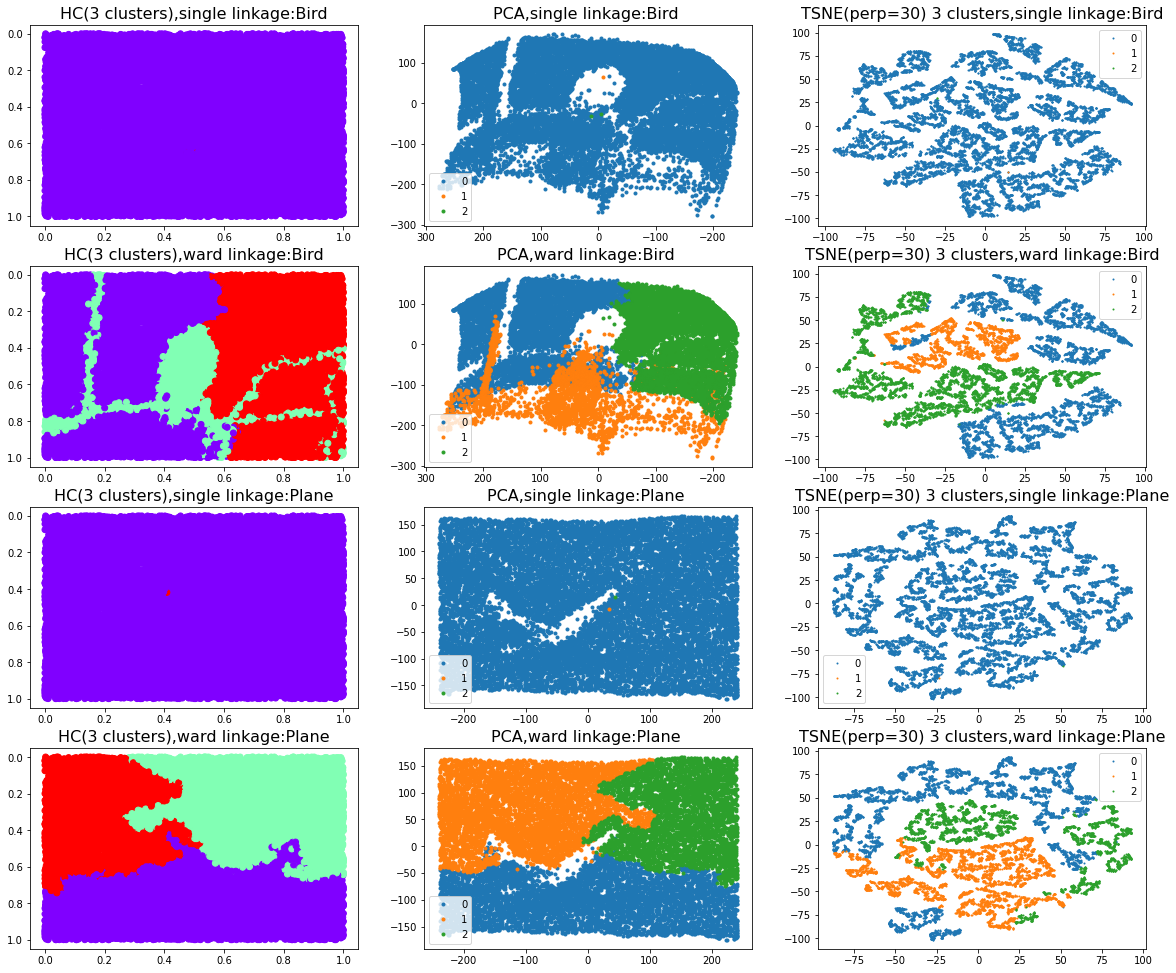

In [59]:
# implementing hierarchical clustering with 3 clusters 
fig = plt.figure(1,figsize=(20, 17))
# bird 
plt.subplot(431)
ac3_b_s = AgglomerativeClustering(n_clusters = 3, linkage = "single") 
hc_3_b_s = ac3_b_s.fit_predict(df_b_s_rescaled)
df_b_s['hc_3_b_s'] = hc_3_b_s  
#plt.figure(figsize =(6, 6)) 
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_3_b_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(3 clusters),single linkage:Bird',fontsize = 16)

# pca single linkage bird
groups = df_b_s.groupby('hc_3_b_s')
ax = plt.subplot(432)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
plt.gca().invert_xaxis()
ax.set_title('PCA,single linkage:Bird ',fontsize = 16)
# tsne single linkage bird
groups = df_b_s.groupby('hc_3_b_s')
ax = plt.subplot(433)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 3 clusters,single linkage:Bird',fontsize = 16)


# ward linkage bird
ax = plt.subplot(434)
ac3_b_w = AgglomerativeClustering(n_clusters = 3, linkage = "ward") 
hc_3_b_w = ac3_b_w.fit_predict(df_b_s_rescaled)
df_b_s['hc_3_b_w'] = hc_3_b_w  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_3_b_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(3 clusters),ward linkage:Bird',fontsize = 16)
# PCA ward bird
groups = df_b_s.groupby('hc_3_b_w')
ax = plt.subplot(435)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Bird ',fontsize = 16)
plt.gca().invert_xaxis()
# tsne ward linkage bird
groups = df_b_s.groupby('hc_3_b_w')
ax = plt.subplot(436)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 3 clusters,ward linkage:Bird',fontsize = 16)



# plane
plt.subplot(437)
ac3_p_s = AgglomerativeClustering(n_clusters = 3, linkage = "single") 
hc_3_p_s = ac3_b_s.fit_predict(df_p_s_rescaled)
df_p_s['hc_3_p_s'] = hc_3_p_s  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_3_p_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(3 clusters),single linkage:Plane',fontsize = 16)
# pca single linkage plane
groups = df_p_s.groupby('hc_3_p_s')
ax = plt.subplot(438)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,single linkage:Plane ',fontsize = 16)
# tsne single linkage plane
groups = df_p_s.groupby('hc_3_p_s')
ax = plt.subplot(4,3,9)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 3 clusters,single linkage:Plane',fontsize = 16)



# ward linkage plane
ax = plt.subplot(4,3,10)
ac3_p_w = AgglomerativeClustering(n_clusters = 3, linkage = "ward") 
hc_3_p_w = ac3_p_w.fit_predict(df_p_s_rescaled)
df_p_s['hc_3_p_w'] = hc_3_p_w  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_3_p_w, cmap ='rainbow') 
plt.gca().invert_yaxis()

plt.title('HC(3 clusters),ward linkage:Plane',fontsize = 16)
# PCA ward plane
groups = df_p_s.groupby('hc_3_p_w')
ax = plt.subplot(4,3,11)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Plane ',fontsize = 16)
# tsne ward linkage plane
groups = df_p_s.groupby('hc_3_p_w')
ax = plt.subplot(4,3,12)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 3 clusters,ward linkage:Plane',fontsize = 16)

Text(0.5, 1.0, 'TSNE(perp=30) 4 clusters,ward linkage:Plane')

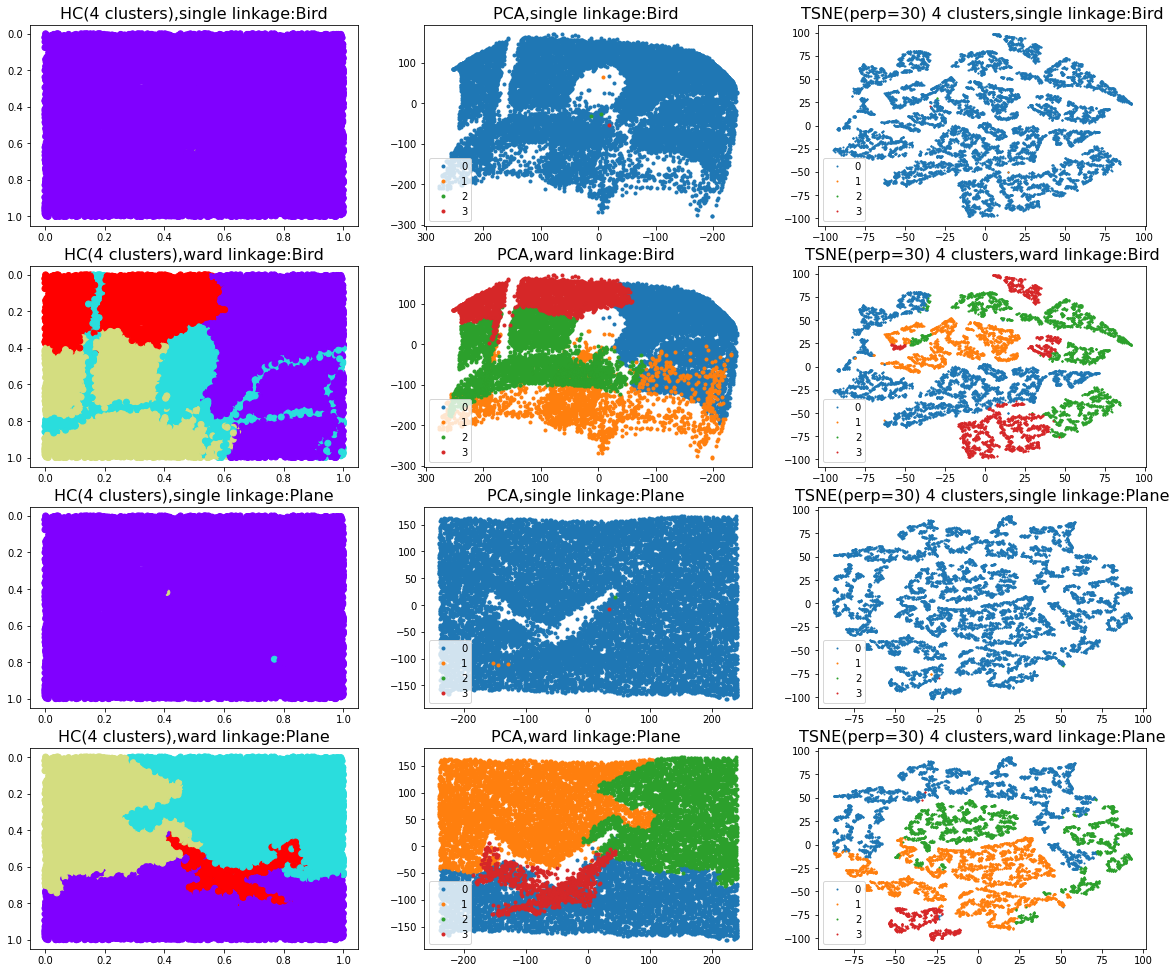

In [49]:
# implementing hierarchical clustering with 4 clusters 
fig = plt.figure(1,figsize=(20, 17))
# bird 
plt.subplot(431)
ac4_b_s = AgglomerativeClustering(n_clusters = 4, linkage = "single") 
hc_4_b_s = ac4_b_s.fit_predict(df_b_s_rescaled)
df_b_s['hc_4_b_s'] = hc_4_b_s  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_4_b_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(4 clusters),single linkage:Bird',fontsize = 16)

# pca single linkage bird
groups = df_b_s.groupby('hc_4_b_s')
ax = plt.subplot(432)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
plt.gca().invert_xaxis()
ax.set_title('PCA,single linkage:Bird ',fontsize = 16)

# tsne single linkage bird
groups = df_b_s.groupby('hc_4_b_s')
ax = plt.subplot(433)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 4 clusters,single linkage:Bird',fontsize = 16)


# ward linkage bird
ax = plt.subplot(434)
ac4_b_w = AgglomerativeClustering(n_clusters = 4, linkage = "ward") 
hc_4_b_w = ac4_b_w.fit_predict(df_b_s_rescaled)
df_b_s['hc_4_b_w'] = hc_4_b_w  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_4_b_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(4 clusters),ward linkage:Bird',fontsize = 16)

# PCA ward bird
groups = df_b_s.groupby('hc_4_b_w')
ax = plt.subplot(435)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Bird ',fontsize = 16)
plt.gca().invert_xaxis()

# tsne ward linkage bird
groups = df_b_s.groupby('hc_4_b_w')
ax = plt.subplot(436)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 4 clusters,ward linkage:Bird',fontsize = 16)


# plane
plt.subplot(437)
ac4_p_s = AgglomerativeClustering(n_clusters = 4, linkage = "single") 
hc_4_p_s = ac4_b_s.fit_predict(df_p_s_rescaled)
df_p_s['hc_4_p_s'] = hc_4_p_s  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_4_p_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(4 clusters),single linkage:Plane',fontsize = 16)

# pca single linkage plane
groups = df_p_s.groupby('hc_4_p_s')
ax = plt.subplot(438)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,single linkage:Plane ',fontsize = 16)

# tsne single linkage plane
groups = df_p_s.groupby('hc_4_p_s')
ax = plt.subplot(4,3,9)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 4 clusters,single linkage:Plane',fontsize = 16)

# ward linkage plane
ax = plt.subplot(4,3,10)
ac4_p_w = AgglomerativeClustering(n_clusters = 4, linkage = "ward") 
hc_4_p_w = ac4_p_w.fit_predict(df_p_s_rescaled)
df_p_s['hc_4_p_w'] = hc_4_p_w  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_4_p_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(4 clusters),ward linkage:Plane',fontsize = 16)

# PCA ward plane
groups = df_p_s.groupby('hc_4_p_w')
ax = plt.subplot(4,3,11)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Plane ',fontsize = 16)

# tsne ward linkage plane
groups = df_p_s.groupby('hc_4_p_w')
ax = plt.subplot(4,3,12)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 4 clusters,ward linkage:Plane',fontsize = 16)

Text(0.5, 1.0, 'TSNE(perp=30) 5 clusters,ward linkage:Plane')

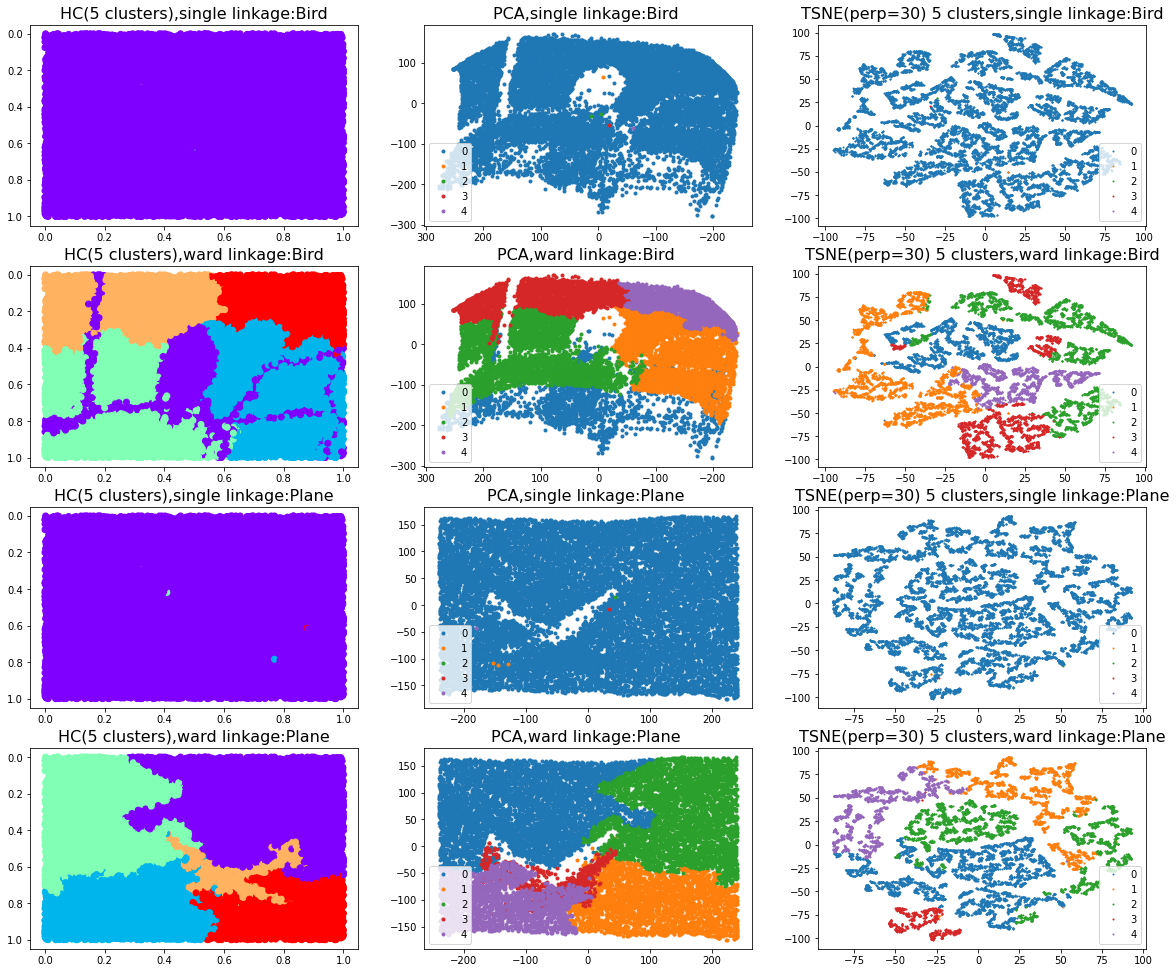

In [50]:
# implementing hierarchical clustering with 5 clusters 
fig = plt.figure(1,figsize=(20, 17))
# bird 
plt.subplot(431)
ac5_b_s = AgglomerativeClustering(n_clusters = 5, linkage = "single") 
hc_5_b_s = ac5_b_s.fit_predict(df_b_s_rescaled)
df_b_s['hc_5_b_s'] = hc_5_b_s  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_5_b_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(5 clusters),single linkage:Bird',fontsize = 16)

# pca single linkage bird
groups = df_b_s.groupby('hc_5_b_s')
ax = plt.subplot(432)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
plt.gca().invert_xaxis()
ax.set_title('PCA,single linkage:Bird ',fontsize = 16)

# tsne single linkage bird
groups = df_b_s.groupby('hc_5_b_s')
ax = plt.subplot(433)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 5 clusters,single linkage:Bird',fontsize = 16)

# ward linkage bird
ax = plt.subplot(434)
ac5_b_w = AgglomerativeClustering(n_clusters = 5, linkage = "ward") 
hc_5_b_w = ac5_b_w.fit_predict(df_b_s_rescaled)
df_b_s['hc_5_b_w'] = hc_5_b_w  
plt.scatter(df_b_s_rescaled[:,1], df_b_s_rescaled[:,0],c = hc_5_b_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(5 clusters),ward linkage:Bird',fontsize = 16)

# PCA ward bird
groups = df_b_s.groupby('hc_5_b_w')
ax = plt.subplot(435)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Bird ',fontsize = 16)
plt.gca().invert_xaxis()

# tsne ward linkage bird
groups = df_b_s.groupby('hc_5_b_w')
ax = plt.subplot(436)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 5 clusters,ward linkage:Bird',fontsize = 16)


# plane
plt.subplot(437)
ac5_p_s = AgglomerativeClustering(n_clusters = 5, linkage = "single") 
hc_5_p_s = ac5_b_s.fit_predict(df_p_s_rescaled)
df_p_s['hc_5_p_s'] = hc_5_p_s  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_5_p_s, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(5 clusters),single linkage:Plane',fontsize = 16)

# pca single linkage plane
groups = df_p_s.groupby('hc_5_p_s')
ax = plt.subplot(438)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,single linkage:Plane ',fontsize = 16)

# tsne single linkage plane
groups = df_p_s.groupby('hc_5_p_s')
ax = plt.subplot(4,3,9)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 5 clusters,single linkage:Plane',fontsize = 16)

# ward linkage plane
ax = plt.subplot(4,3,10)
ac5_p_w = AgglomerativeClustering(n_clusters = 5, linkage = "ward") 
hc_5_p_w = ac5_p_w.fit_predict(df_p_s_rescaled)
df_p_s['hc_5_p_w'] = hc_5_p_w  
plt.scatter(df_p_s_rescaled[:,1], df_p_s_rescaled[:,0],c = hc_5_p_w, cmap ='rainbow') 
plt.gca().invert_yaxis()
plt.title('HC(5 clusters),ward linkage:Plane',fontsize = 16)

# PCA ward plane
groups = df_p_s.groupby('hc_5_p_w')
ax = plt.subplot(4,3,11)
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('PCA,ward linkage:Plane ',fontsize = 16)

# tsne ward linkage plane
groups = df_p_s.groupby('hc_5_p_w')
ax = plt.subplot(4,3,12)
for name, group in groups:
    ax.plot(group.tsne1, group.tsne2, marker='o', linestyle='', ms=1, label=name)
ax.legend()
ax.set_title('TSNE(perp=30) 5 clusters,ward linkage:Plane',fontsize = 16)

In [60]:
# Silhouette score  bird single linkage
print("Silhouette score for 2 clusters,single linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_2_b_s, metric = 'euclidean'))
print("Silhouette score for 3 clusters,single linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_3_b_s, metric = 'euclidean'))
print("Silhouette score for 4 clusters,single linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_4_b_s, metric = 'euclidean'))
print("Silhouette score for 5 clusters,single linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_5_b_s, metric = 'euclidean'))

# Silhouette score  bird ward linkage
print("Silhouette score for 2 clusters,ward linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_2_b_w, metric = 'euclidean'))
print("Silhouette score for 3 clusters,ward linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_3_b_w, metric = 'euclidean'))
print("Silhouette score for 4 clusters,ward linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_4_b_w, metric = 'euclidean'))
print("Silhouette score for 5 clusters,ward linkage:bird : ",metrics.silhouette_score(df_b_s_rescaled, hc_5_b_w, metric = 'euclidean'))


Silhouette score for 2 clusters,single linkage:bird :  -0.2009062758787486
Silhouette score for 3 clusters,single linkage:bird :  -0.2938264868286697
Silhouette score for 4 clusters,single linkage:bird :  -0.3469139618750652
Silhouette score for 5 clusters,single linkage:bird :  -0.35936274608712165
Silhouette score for 2 clusters,ward linkage:bird :  0.4645842243042747
Silhouette score for 3 clusters,ward linkage:bird :  0.3559444234029651
Silhouette score for 4 clusters,ward linkage:bird :  0.3559632999892787
Silhouette score for 5 clusters,ward linkage:bird :  0.35400368386588826


##  We observe that Silhouette score for single linkage is negative, thus it will not be useful for clustering.
 ## Silhouette score for ward linkage is maximum for 2 clusters for the image of bird, so we will use 2 clusters.

In [61]:
# CH score  bird single linkage
print("CH score for 2 clusters,single linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_2_b_s))
print("CH score for 3 clusters,single linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_3_b_s))
print("CH score for 4 clusters,single linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_4_b_s))
print("CH score for 5 clusters,single linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_5_b_s))

# Silhouette score  bird ward linkage
print("CH score for 2 clusters,ward linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_2_b_w))
print("CH score for 3 clusters,ward linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_3_b_w))
print("CH score for 4 clusters,ward linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_4_b_w))
print("CH score for 5 clusters,ward linkage:bird: ",metrics.calinski_harabasz_score(df_b_s_rescaled, hc_5_b_w))

CH score for 2 clusters,single linkage:bird:  0.28696194075162973
CH score for 3 clusters,single linkage:bird:  0.4776124142312071
CH score for 4 clusters,single linkage:bird:  0.3880665641608879
CH score for 5 clusters,single linkage:bird:  0.7071099681581288
CH score for 2 clusters,ward linkage:bird:  9766.15797516664
CH score for 3 clusters,ward linkage:bird:  10260.552015452375
CH score for 4 clusters,ward linkage:bird:  10530.220622762146
CH score for 5 clusters,ward linkage:bird:  10790.036406925556


In [57]:
# Silhouette score  plane single linkage
print("Silhouette score for 2 clusters,single linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_2_p_s, metric = 'euclidean'))
print("Silhouette score for 3 clusters,single linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_3_p_s, metric = 'euclidean'))
print("Silhouette score for 4 clusters,single linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_4_p_s, metric = 'euclidean'))
print("Silhouette score for 5 clusters,single linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_5_p_s, metric = 'euclidean'))

# Silhouette score  plane ward linkage
print("Silhouette score for 2 clusters,ward linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_2_p_w, metric = 'euclidean'))
print("Silhouette score for 3 clusters,ward linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_3_p_w, metric = 'euclidean'))
print("Silhouette score for 4 clusters,ward linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_4_p_w, metric = 'euclidean'))
print("Silhouette score for 5 clusters,ward linkage:plane : ",metrics.silhouette_score(df_p_s_rescaled, hc_5_p_w, metric = 'euclidean'))


Silhouette score for 2 clusters,single linkage:plane :  0.006615788209559702
Silhouette score for 3 clusters,single linkage:plane :  -0.0906760526571738
Silhouette score for 4 clusters,single linkage:plane :  -0.1182905371164275
Silhouette score for 5 clusters,single linkage:plane :  -0.22536814601830812
Silhouette score for 2 clusters,ward linkage:plane :  0.3403222151372472
Silhouette score for 3 clusters,ward linkage:plane :  0.3202894495070594
Silhouette score for 4 clusters,ward linkage:plane :  0.37036717433138255
Silhouette score for 5 clusters,ward linkage:plane :  0.37851415649252973


## We observe that Silhouette score for single linkage is negative, thus it will not be useful for clustering.
 ## Silhouette score for ward linkage is maximum for 5 clusters for the image of plane, so we will use 5 clusters.

In [58]:
# CH score  plane single linkage
print("CH score for 2 clusters,single linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_2_p_s))
print("CH score for 3 clusters,single linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_3_p_s))
print("CH score for 4 clusters,single linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_4_p_s))
print("CH score for 5 clusters,single linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_5_p_s))

# CH score  bird ward linkage
print("CH score for 2 clusters,ward linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_2_p_w))
print("CH score for 3 clusters,ward linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_3_p_w))
print("CH score for 4 clusters,ward linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_4_p_w))
print("CH score for 5 clusters,ward linkage:plane: ",metrics.calinski_harabasz_score(df_p_s_rescaled, hc_5_p_w))

CH score for 2 clusters,single linkage:plane:  0.7098055562215623
CH score for 3 clusters,single linkage:plane:  0.5803206728420324
CH score for 4 clusters,single linkage:plane:  2.190242972908102
CH score for 5 clusters,single linkage:plane:  1.8378408487402635
CH score for 2 clusters,ward linkage:plane:  7541.413755670094
CH score for 3 clusters,ward linkage:plane:  7653.658771683927
CH score for 4 clusters,ward linkage:plane:  9312.089103821003
CH score for 5 clusters,ward linkage:plane:  11232.476029670712
